Thông tin dữ liệu ratings.csv (trước khi lọc):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None

Thông tin dữ liệu processed_movies.csv (sau khi lọc):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1000000 non-null  int64  
 1   movieId  1000000 non-null  int64  
 2   title    1000000 non-null  object 
 3   year     1000000 non-null  float64
 4   rating   1000000 non-null  float64
 5   genres   1000000 non-null  object 
 6   tag      1000000 non-null  object 
 7   content  1000000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 61.0+ MB
None


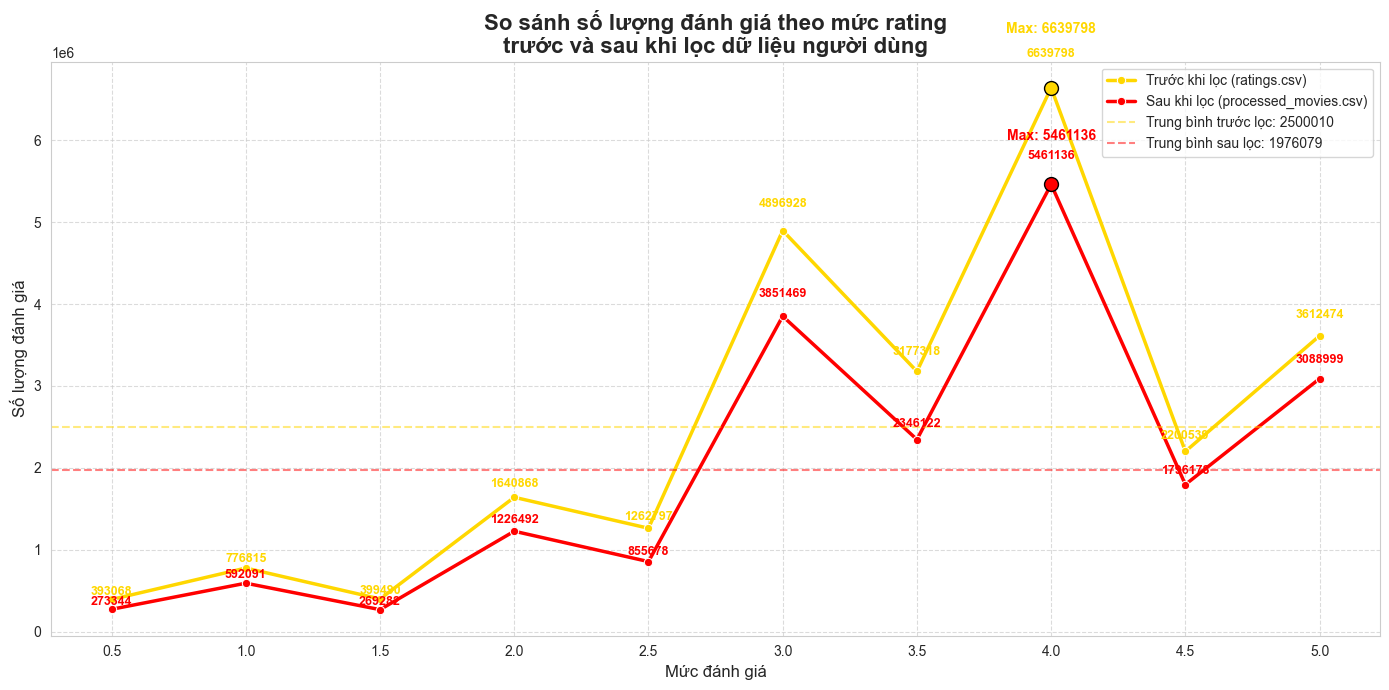

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo thư mục notebooks tồn tại
os.makedirs("notebooks", exist_ok=True)

# Load dữ liệu
tep_ratings_goc = r"E:\ĐATN\data\ratings.csv"  # Dữ liệu gốc trước khi lọc
tep_phim_da_xuly = r"E:\ĐATN\data\processed_movies.csv"  # Dữ liệu phim đã xử lý

# Đọc dữ liệu ratings.csv (trước khi lọc)
danh_gia_goc = pd.read_csv(tep_ratings_goc)
print("Thông tin dữ liệu ratings.csv (trước khi lọc):")
print(danh_gia_goc.info())

# Đọc dữ liệu processed_movies.csv (sau khi lọc)
phim_da_xuly = pd.read_csv(tep_phim_da_xuly)
print("\nThông tin dữ liệu processed_movies.csv (sau khi lọc):")
print(phim_da_xuly.info())

# ---- Bắt đầu xử lý ----
# Trước khi lọc: tổng số lượng đánh giá theo từng mức rating
so_luong_danh_gia_truoc_loc = danh_gia_goc["rating"].value_counts().sort_index()

# Sau khi lọc: chỉ giữ các userId tồn tại trong phim_da_xuly
danh_sach_user_da_loc = phim_da_xuly["userId"].unique()
danh_gia_sau_loc = danh_gia_goc[danh_gia_goc["userId"].isin(danh_sach_user_da_loc)]
so_luong_danh_gia_sau_loc = danh_gia_sau_loc["rating"].value_counts().sort_index()

# Các mức rating từ 0.5 đến 5.0
muc_danh_gia = [i * 0.5 for i in range(1, 11)]

# Đảm bảo các mức rating đều có dữ liệu
so_luong_danh_gia_truoc_loc = so_luong_danh_gia_truoc_loc.reindex(muc_danh_gia, fill_value=0)
so_luong_danh_gia_sau_loc = so_luong_danh_gia_sau_loc.reindex(muc_danh_gia, fill_value=0)

# ---- Vẽ biểu đồ ----
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Vẽ hai đường
sns.lineplot(x=muc_danh_gia, y=so_luong_danh_gia_truoc_loc.values, label="Trước khi lọc (ratings.csv)", color="gold", marker="o", linewidth=2.5)
sns.lineplot(x=muc_danh_gia, y=so_luong_danh_gia_sau_loc.values, label="Sau khi lọc (processed_movies.csv)", color="red", marker="o", linewidth=2.5)

# Thêm số lượng đánh giá tại từng điểm (dịch lên 5% giá trị y + 1200 đơn vị)
for x, y in zip(muc_danh_gia, so_luong_danh_gia_truoc_loc.values):
    plt.text(x, y + y * 0.05 + 1500, f"{y}", ha='center', va='bottom', fontsize=9, color="gold", fontweight='bold')

for x, y in zip(muc_danh_gia, so_luong_danh_gia_sau_loc.values):
    plt.text(x, y + y * 0.05 + 1500, f"{y}", ha='center', va='bottom', fontsize=9, color="red", fontweight='bold')

# Thêm đường trung bình
trung_binh_truoc_loc = so_luong_danh_gia_truoc_loc.mean()
trung_binh_sau_loc = so_luong_danh_gia_sau_loc.mean()

plt.axhline(trung_binh_truoc_loc, color='gold', linestyle='--', alpha=0.5, label=f"Trung bình trước lọc: {trung_binh_truoc_loc:.0f}")
plt.axhline(trung_binh_sau_loc, color='red', linestyle='--', alpha=0.5, label=f"Trung bình sau lọc: {trung_binh_sau_loc:.0f}")

# Đánh dấu điểm cao nhất
muc_danh_gia_max_truoc = so_luong_danh_gia_truoc_loc.idxmax()
so_luong_max_truoc = so_luong_danh_gia_truoc_loc.max()
plt.scatter(muc_danh_gia_max_truoc, so_luong_max_truoc, color="gold", s=100, edgecolors='black', zorder=5)
plt.text(muc_danh_gia_max_truoc, so_luong_max_truoc + so_luong_max_truoc * 0.1, f"Max: {so_luong_max_truoc}", ha='center', color='gold', fontweight='bold')

muc_danh_gia_max_sau = so_luong_danh_gia_sau_loc.idxmax()
so_luong_max_sau = so_luong_danh_gia_sau_loc.max()
plt.scatter(muc_danh_gia_max_sau, so_luong_max_sau, color="red", s=100, edgecolors='black', zorder=5)
plt.text(muc_danh_gia_max_sau, so_luong_max_sau + so_luong_max_sau * 0.1, f"Max: {so_luong_max_sau}", ha='center', color='red', fontweight='bold')

# Các cài đặt khác
plt.xlabel("Mức đánh giá", fontsize=12)
plt.ylabel("Số lượng đánh giá", fontsize=12)
plt.title("So sánh số lượng đánh giá theo mức rating\ntrước và sau khi lọc dữ liệu người dùng", fontsize=16, fontweight='bold')
plt.xticks(muc_danh_gia, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

test_df = pd.read_csv(r"E:\ĐATN_3\data\test_dl.csv")
print(test_df["rating"].describe())
print(f"Percentage of ratings >= 3.5: {(test_df['rating'] >= 3.5).mean():.4f}")

count    348535.000000
mean          3.291700
std           1.100422
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
Percentage of ratings >= 3.5: 0.5490
